In [82]:
# load libraries

library(tm)
library(readr)
library(ggplot2)

In [83]:
# upload BIOS512 syllabus for analysis
# use modified version of the syllabus consisting of Course Description-Final project
# modified version of the syllabus excludes sections Course Grading Scale(s)-Technical support

syllabuspath="C:\\Users\\A computer\\Documents\\MyPythonFiles\\Files\\SYLLABUSforanalysis.txt"

syllabustext=read_file(syllabuspath)


In [84]:
# start cleaning syllabus text

syllabustext <- gsub("\n", " ", syllabustext)

print(syllabustext)

[1] "# Course Description This course will be an introductory course to data science and is required for MPH students with concentration in Public Health Data Science. The goals of the course are to, 1. achieve proficiency in the R programming language, with particular emphasis    on the Tidyverse; 1. gain familiarity with a suite of data science tools; 1. master the practices of good data science; and, 1. learn how to apply the methods and tools to public health datasets.  # Prerequisites This course is required for MPH students with concentration in Public Health Data Science and is appropriate for master's students in quantitative fields. PhD students in computer science, business, psychology, social science, and science may also find this course useful. There are no pre-requisites beyond those required for entry into the MPH program.  # Instructor Chuck Pepe-Ranney, PhD   Visiting Lecturer   Department of Biostatistics   3101A McGavran-Greenberg Hall   Phone: 575-313-0993   Email: 

In [85]:
# add a space between text and its hyperlink to prepare for later when punctuation is removed

syllabustext <- gsub("https", " https", syllabustext)


In [86]:
# remove plurals

syllabustext <- gsub("s ", "  ", syllabustext)
print(syllabustext)

[1] "# Course Description Thi  course will be an introductory course to data science and i  required for MPH student  with concentration in Public Health Data Science. The goal  of the course are to, 1. achieve proficiency in the R programming language, with particular emphasi     on the Tidyverse; 1. gain familiarity with a suite of data science tools; 1. master the practice  of good data science; and, 1. learn how to apply the method  and tool  to public health datasets.  # Prerequisite  Thi  course i  required for MPH student  with concentration in Public Health Data Science and i  appropriate for master'  student  in quantitative fields. PhD student  in computer science, business, psychology, social science, and science may also find thi  course useful. There are no pre-requisite  beyond those required for entry into the MPH program.  # Instructor Chuck Pepe-Ranney, PhD   Visiting Lecturer   Department of Biostatistic    3101A McGavran-Greenberg Hall   Phone: 575-313-0993   Email: 

In [87]:
# convert the syllabustext into a corpus and inspect the corpus

syllabusCorpus <- Corpus(VectorSource(syllabustext))
inspect(syllabusCorpus)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

[1] # Course Description Thi  course will be an introductory course to data science and i  required for MPH student  with concentration in Public Health Data Science. The goal  of the course are to, 1. achieve proficiency in the R programming language, with particular emphasi     on the Tidyverse; 1. gain familiarity with a suite of data science tools; 1. master the practice  of good data science; and, 1. learn how to apply the method  and tool  to public health datasets.  # Prerequisite  Thi  course i  required for MPH student  with concentration in Public Health Data Science and i  appropriate for master'  student  in quantitative fields. PhD student  in computer science, business, psychology, social science, and science may also find thi  course useful. There are no pre-requisite  beyond those required for entry into the MPH program.  # Instructor Chuck Pepe-Ranney, PhD   Visiting Lec

In [88]:
# common cleaning of the corpus to convert all to lowercase, remove numbers and punctuation

syllabusCorpus <- tm_map(syllabusCorpus,tolower)

syllabusCorpus <- tm_map(syllabusCorpus,removeNumbers)

syllabusCorpus <- tm_map(syllabusCorpus,removePunctuation)


inspect(syllabusCorpus)


Warning message in tm_map.SimpleCorpus(syllabusCorpus, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(syllabusCorpus, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(syllabusCorpus, removePunctuation):
"transformation drops documents"

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

[1]  course description thi  course will be an introductory course to data science and i  required for mph student  with concentration in public health data science the goal  of the course are to  achieve proficiency in the r programming language with particular emphasi     on the tidyverse  gain familiarity with a suite of data science tools  master the practice  of good data science and  learn how to apply the method  and tool  to public health datasets   prerequisite  thi  course i  required for mph student  with concentration in public health data science and i  appropriate for master  student  in quantitative fields phd student  in computer science business psychology social science and science may also find thi  course useful there are no prerequisite  beyond those required for entry into the mph program   instructor chuck peperanney phd   visiting lecturer   department of biostati

In [89]:
# remove stop words such as and, but, not, the

syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "and")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "but")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "not")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "the")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "to")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "that")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "they")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "you")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "are")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "for")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "will")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "this")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "thi")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "if")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "of")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "in")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "is")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "on")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "of")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "with")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "may")
syllabusCorpus <- tm_map(syllabusCorpus, removeWords, "all")


inspect(syllabusCorpus)

Warning message in tm_map.SimpleCorpus(syllabusCorpus, removeWords, "and"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(syllabusCorpus, removeWords, "but"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(syllabusCorpus, removeWords, "not"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(syllabusCorpus, removeWords, "the"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(syllabusCorpus, removeWords, "to"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(syllabusCorpus, removeWords, "that"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(syllabusCorpus, removeWords, "they"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(syllabusCorpus, removeWords, "you"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(syllabusCorpus, removeWords, "are"):
"transformation drops documents"Warning message in tm_map.S

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

[1]  course description   course  be an introductory course  data science  i  required  mph student   concentration  public health data science  goal    course    achieve proficiency   r programming language  particular emphasi       tidyverse  gain familiarity  a suite  data science tools  master  practice   good data science   learn how  apply  method   tool   public health datasets   prerequisite    course i  required  mph student   concentration  public health data science  i  appropriate  master  student   quantitative fields phd student   computer science business psychology social science  science  also find   course useful there  no prerequisite  beyond those required  entry into  mph program   instructor chuck peperanney phd   visiting lecturer   department  biostatistic    a mcgavrangreenberg hall   phone    email cpeperanneyagbiomecom     teaching assistant tbd   office hours 

In [90]:
# Create a Term Document Matrix

tdm_syllabus<-TermDocumentMatrix (syllabusCorpus)
tdm_syllabus
inspect(tdm_syllabus)




<<TermDocumentMatrix (terms: 202, documents: 1)>>
Non-/sparse entries: 202/0
Sparsity           : 0%
Maximal term length: 25
Weighting          : term frequency (tf)

<<TermDocumentMatrix (terms: 202, documents: 1)>>
Non-/sparse entries: 202/0
Sparsity           : 0%
Maximal term length: 25
Weighting          : term frequency (tf)
Sample             :
            Docs
Terms         1
  assignment  8
  competency  4
  course     17
  data       21
  health      5
  practice    4
  project     4
  public      5
  science    16
  tool        5


In [96]:
TDM1<-as.matrix(tdm_syllabus, control=tf) #Convert this into a matrix format


In [97]:
v <- sort(rowSums(TDM1),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
shortlist <- head(d, 12)
shortlist


,word,freq
,<fct>,<dbl>
data,data,21
course,course,17
science,science,16
assignment,assignment,8
health,health,5
public,public,5
tool,tool,5
competency,competency,4
practice,practice,4


In [93]:
library(ggplot2)

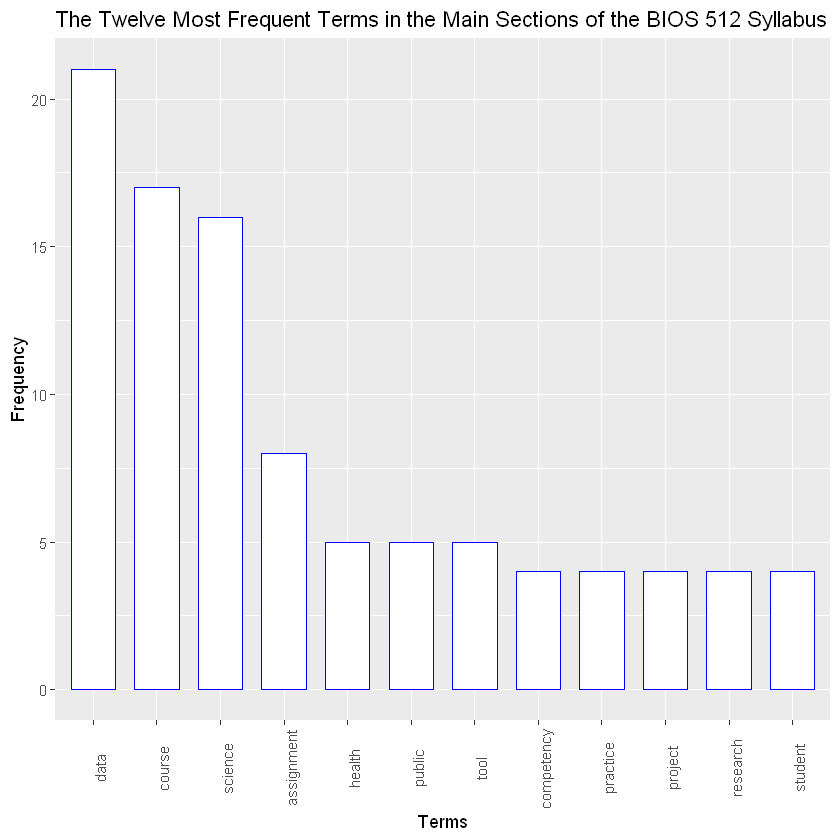

In [98]:
p = ggplot(data = shortlist, aes(x = reorder(word, -freq), y=freq)) + geom_bar(stat="identity", color="blue", fill="white", width=0.7) 
p = p + theme(axis.text.x=element_text(angle=90))
p = p + ggtitle("The Twelve Most Frequent Terms in the Main Sections of the BIOS 512 Syllabus") +
  xlab("Terms") + ylab("Frequency")
p